
1. Create a dataframe called ‘exposome’ using the exposome dataset and answer the
following questions. Refer the Codebook file to find the field and values. You will
use the datasets and dataframe from Part 1 of this assignment.
    1. Add a new column to the dataframe exposome called ‘cotinine_combination’
which combines all possible values of cotinine in mother
(hs_cotinine_mcat_None) and cotinine in child (hs_cotinine_cdich_None). Create
values of your choice in this new field and provide a count for each of these
combined values. (15 Points)
    2. Using the exposome and phenotype dataframes, plot ‘cotinine_combination’
and the patients having doctor diagnosed asthma. 15 Points)




In [2]:
#Questoin 1.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_exposome = pd.read_csv('exposome.csv')
df_codebook = pd.read_csv('codebook.csv')

# Check each column name and add to list if it contains 'cotinine'
cotinine_col = []

for column in df_exposome.columns:
    if 'cotinine' in column:
        cotinine_col.append(column)

# extract relavent variables from codebook
codes = df_codebook[df_codebook['variable_name'].isin(cotinine_col)] # Looks like we are intersted in hs_cotinine_cdich and hs_cotinine_mcat columns

# Identify unique values for relavent columns
cdich_unique = df_exposome['hs_cotinine_cdich_None'].unique()
mcat_unique = df_exposome['hs_cotinine_mcat_None'].unique()

# Combine two columns and add to exposome dataframe
df_exposome['cotinine_combined'] = df_exposome['hs_cotinine_cdich_None'] + " " + df_exposome['hs_cotinine_mcat_None']

# Counts of each cotinine_combined value
df_exposome['cotinine_combined'].value_counts()

cotinine_combined
Undetected Non-smokers    697
Undetected Smokers        273
Detected Smokers          112
Undetected SHS smokers    108
Detected Non-smokers       62
Detected SHS smokers       49
Name: count, dtype: int64

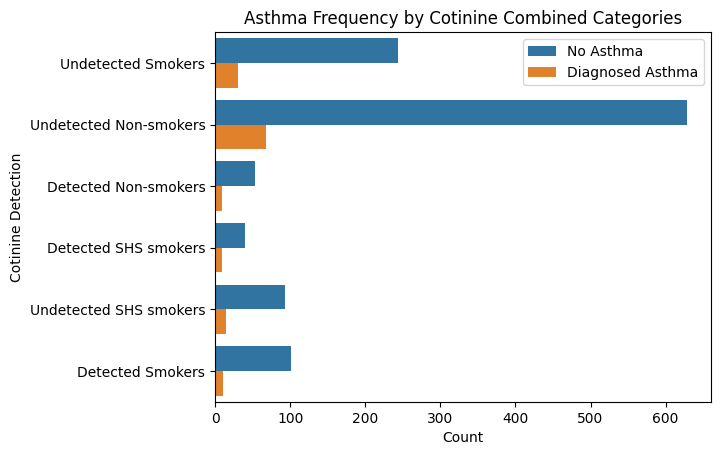

In [3]:
# Question 1.2
df_phenotype = pd.read_csv('phenotype.csv')

# double check codes for phenotype asthma
codes = df_codebook[df_codebook['variable_name'] == 'hs_asthma'] # Codes don't specifiy but we'll assume 0 = no asthma, 1 = asthma

# Merge phenotype and exposome dataframes
df_combined = pd.merge(df_phenotype, df_exposome, on='ID')
df_combined.head()

# plot
sns.countplot(y='cotinine_combined', hue='hs_asthma', data=df_combined)

plt.title('Asthma Frequency by Cotinine Combined Categories')
plt.xlabel('Count')
plt.ylabel('Cotinine Detection')
legend_labels = ['No Asthma', 'Diagnosed Asthma']
plt.legend(labels=legend_labels)
plt.show()

2. Please use the file ‘NO2_2020_California’ to answer the following questions. You can
use Python, R, or other programming languages that you are familiar with:
    1. How many unique county names are in this file? After checking how many
unique counties in this file, please choose a reasonable plot to show the
distribution of counties. You can use either matplotlib or seaborn. (15 Points)

Unique Counties: 
33


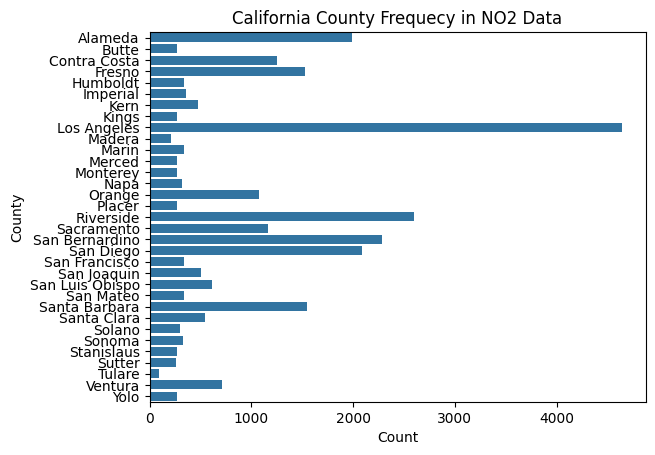

In [22]:
# Question 2.1
df_NO2 = pd.read_csv('NO2_2020_CA.csv')

# find unique counties
county_unique = df_NO2['COUNTY'].unique()
print("Unique Counties: ")
print(len(county_unique))

# plot
sns.countplot(y='COUNTY', data=df_NO2)
plt.title('California County Frequecy in NO2 Data')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

3. Please use the file ‘NO2_2020_California’ to answer the following questions:
    1. Find the geo-coordinates for ‘Martin Luther King High School’ with address
‘9301 Wood Rd, Riverside, CA 92508’. (5 Points)
    2. Find the nearest monitor by distance in the file ‘NO2_2020_California’ to the
above school. (10 Points)
    3. Next, find the monthly average, monthly minimum and monthly maximum for
NO2 for this monitor for the year 2020. (15 Points)
    4. Plot the monthly average, monthly minimum and monthly maximum NO2 on a
graph using matplotlib or seaborn. (15 Points)

In [23]:
df_NO2.head()

,Date,Source,Site ID,POC,Daily Max 1-hour NO2 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,1/1/2020,AQS,60010007,1,18.5,ppb,17,Livermore,23,96,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,1/2/2020,AQS,60010007,1,22.7,ppb,21,Livermore,23,96,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,1/3/2020,AQS,60010007,1,23.6,ppb,22,Livermore,23,96,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,1/4/2020,AQS,60010007,1,21.2,ppb,20,Livermore,23,96,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,1/5/2020,AQS,60010007,1,23.0,ppb,22,Livermore,23,96,42602,Nitrogen dioxide (NO2),41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [33]:
# Question 3.1
from geopy.geocoders import Nominatim
from geopy import distance

geolocator = Nominatim(user_agent="wrangling assignment 2")
mlk_location = geolocator.geocode("9301 Wood Rd, Riverside, CA 92508")
mlk_lat = mlk_location.latitude
mlk_long = mlk_location.longitude
print(mlk_lat, mlk_long)

33.8826141 -117.33344395658602
